# Ejercicio 10 - Test de Chi-cuadrado

**Objetivo**: Diseñar, implementar y verificar una función que calcule el test de "chi-cuadrado" para comparar un histograma H₁ con un modelo dado por una distribución Binomial, f(x) ∼ B(n = 10, p = 0.4).

## Marco Teórico

### ¿Qué es el Test de Chi-cuadrado?

El test de chi-cuadrado (χ²) es una prueba estadística que permite determinar si existe una diferencia significativa entre las frecuencias observadas y las frecuencias esperadas en una o más categorías.

**Hipótesis:**
- H₀: Los datos siguen la distribución propuesta (Binomial en nuestro caso)
- H₁: Los datos NO siguen la distribución propuesta

**Estadístico de prueba:**
χ² = Σᵢ [(Oᵢ - Eᵢ)² / Eᵢ]

Donde:
- Oᵢ = frecuencia observada en la categoría i
- Eᵢ = frecuencia esperada en la categoría i según el modelo teórico
- Se suma sobre todas las categorías (bins del histograma)


Teorico 25 = MAthematical capitulo 6
luego ver codigos en numerical recipities.

### Distribución Binomial

Una variable aleatoria X sigue una distribución binomial B(n,p) cuando:
- Se realizan n ensayos independientes
- Cada ensayo tiene probabilidad p de éxito
- X cuenta el número de éxitos

**Función de masa de probabilidad:**
$P(X = k) = C(n,k) × p^k × (1-p)^{(n-k)}$

Para nuestro caso: **B(n=10, p=0.4)**
- n = 10 ensayos
- p = 0.4 probabilidad de éxito
- X puede tomar valores {0, 1, 2, ..., 10}
- Media: μ = np = 10 × 0.4 = 4
- Varianza: σ² = np(1-p) = 10 × 0.4 × 0.6 = 2.4

In [52]:
# Importar librerías necesarias
import numpy as np #Esta librería es para cálculos numéricos
import matplotlib.pyplot as plt
import scipy.stats as sp

In [ ]:
# (a) 
# Basicamente, la variable aleatoria X sigue una distribucion binomial B(n, p). El numero de la muestra es N_obs = 100.
# Parámetros de la distribución binomial
n = 10  # número de ensayos. Los ensayos representan el número de intentos en cada observación. Cada ensayo puede resultar en éxito o fracaso.
p = 0.4  # probabilidad de éxito. El exito es el resultado que estamos interesados en medir.
N_obs = 100  # número de observaciones a simular

# Generar 100 observaciones de la binomial B(10, 0.4)
np.random.seed(42)  # semilla de aleatoriedad para reproducibilidad, con esto obtenemos siempre los mismos resultados, controlamos la aleatoriedad
muestra_N = np.random.binomial(n, p, N_obs) # Genera una muestra de tamaño N_obs de una distribución binomial con parámetros n y p

print(f"Primeras 100 observaciones: {muestra_N[:100]}")
# Calculo de frecuencias observadas de la muestra de 100 observaciones
# Para cada valor posible de X (de 0 a n), contamos cuántas veces aparece en los datos observados, es decir en la muestra de 100 observaciones
valores_unicos, aux = np.unique(muestra_N, return_counts=True)

frecuencias_muestra = np.zeros(n + 1)

frecuencias_muestra[valores_unicos] = aux

Primeras 100 observaciones: [3 7 5 4 2 2 2 6 4 5 1 7 5 3 3 3 3 4 4 3 4 2 3 3 4 5 3 4 4 2 4 3 2 7 7 5 3
 2 5 4 2 4 1 6 3 5 3 4 4 3 7 5 6 6 4 6 2 3 1 3 4 3 5 3 3 4 2 5 2 7 5 3 0 5
 5 5 5 2 3 2 6 4 3 2 3 3 5 5 6 4 2 5 5 4 5 4 4 4 1 2]


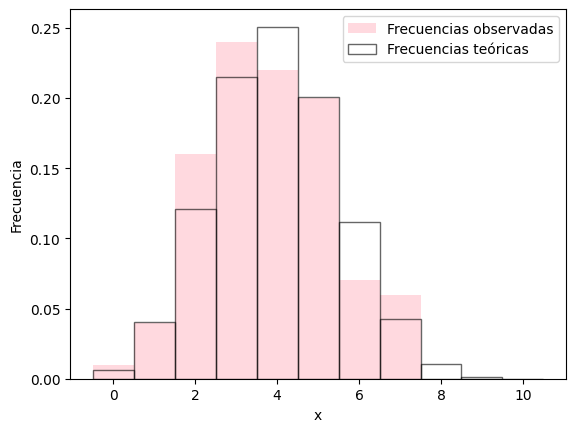

In [54]:
#DISTRIBUCION TEORICA
# Calculo de frecuencias teoricas binomial
n=10
p=0.4
teorica = sp.binom.pmf(np.arange(0, n+1), n, p)  # pmf: probability mass function. Esta función calcula la probabilidad de que una variable aleatoria discreta tome un valor específico.

#Histograma de frecuencias observadas en la muestra
plt.hist(muestra_N, bins=np.arange(-0.5, n+1.5, 1), density=True, alpha=0.6, color='pink', label='Frecuencias observadas')
# Histograma de frecuencias teoricas binomial
plt.bar(np.arange(0, n+1), teorica, facecolor='none', edgecolor='black', width=1, alpha=0.6, color='b', label='Frecuencias teóricas')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [55]:
# (b) Cálculo del estadístico χ² 

# Frecuencias observadas y esperadas
freq_observadas = np.zeros(n+1) #un array de ceros de tamaño n+1 (de 0 a n). El siguiente devuelve 2 arrays.
valores_unicos, conteos = np.unique(muestra_N, return_counts=True) # np.unique agarra la muestra de 100 observaciones y crea un array de los valores unicos, a su vez el returncrea otro array con la cantidad de veces que aparece cada valor unico en la muestra
for valor, conteo in zip(valores_unicos, conteos):
    freq_observadas[valor] = conteo
freq_esperadas = N_obs * teorica
# Estadístico χ²
chi = 0
for i in range(len(frecuencias_muestra)):
    chi += ((frecuencias_muestra[i] - freq_esperadas[i])**2) / freq_esperadas[i]

print(f"Estadístico χ² = {chi}")

Estadístico χ² = 5.687223087215881


In [56]:
# (c) Prueba de hipótesis

alpha = 0.05
valor_critico = sp.chi2.ppf(1 - alpha, 9) 

print(f"H₀: Los datos siguen B(10, 0.4)")
print(f"H₁: Los datos NO siguen B(10, 0.4)")
print(f"α = {alpha}")
print(f"χ² = {chi}")
print(f"Valor crítico = {valor_critico}")


# Decisión
if chi > valor_critico:
    print("DECISIÓN: RECHAZAMOS H₀")
else:
    print("DECISIÓN: NO RECHAZAMOS H₀")
    

H₀: Los datos siguen B(10, 0.4)
H₁: Los datos NO siguen B(10, 0.4)
α = 0.05
χ² = 5.687223087215881
Valor crítico = 16.918977604620448
DECISIÓN: NO RECHAZAMOS H₀


In [57]:
#(d) Valor-p
p = sp.chi2.sf(chi, n)
print(p)

0.8408212895922103


In [58]:
#los comparamos con los resultados de la librería scipy.stats
chif, pf = sp.chisquare(frecuencias_muestra, freq_esperadas)
print('El valor de χ² es', chif, 'y el p-valor es', pf)

El valor de χ² es 5.68722308721588 y el p-valor es 0.8408212895922105


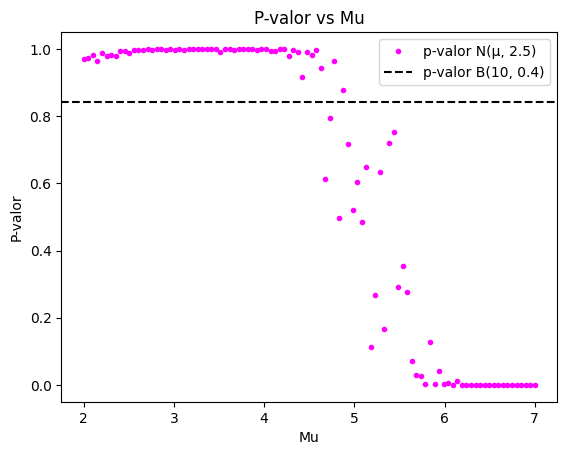

In [59]:
# (e) Simulación: N(μ, σ=2.5) vs B(10, 0.4) para μ ∈ [2, 7]
sigma, N_obs = 2.5, 100
mu_vals = np.linspace(2, 7, 100)
chi_values = []
p_values = []

for i in range(100):
    gauss = np.random.normal(loc=mu_vals[i], scale=2.5, size=1000)
    gauss_discreto = np.histogram(gauss, bins=11, range=(-0.5,10.5))
    gauss_discreto = np.array(gauss_discreto[0]/np.sum(gauss_discreto[0]))
    l, k = sp.chisquare(gauss_discreto, teorica)
    chi_values.append(l)
    p_values.append(k)

plt.plot(mu_vals, p_values, 'o', markersize=3, color='fuchsia', label='p-valor N(μ, 2.5)')
plt.xlabel('Mu')
plt.ylabel('P-valor')
plt.axhline(pf, color='black', linestyle='--', label='p-valor B(10, 0.4)')
plt.title('P-valor vs Mu')
plt.legend()
plt.show()


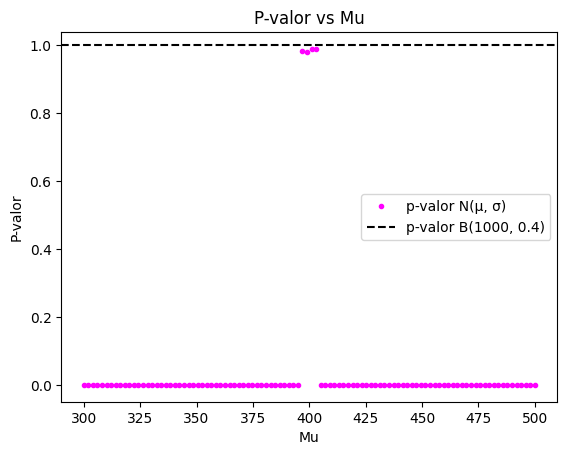

In [62]:
# (f) Simulación: N(μ, σ) vs B(1000, 0.4) para μ ∈ [300, 500]

N_grande = 10000
n_grande = 1000
p = 0.4

# muestra binomial teorica
muestra_bin_g = np.random.binomial(n_grande, p, size=N_grande)
frecuencias_muestra_g, bins = np.histogram(muestra_bin_g, bins=np.arange(-0.5, n_grande + 1.5, 1))
frecuencias_esperadas_g = sp.binom.pmf(np.arange(n_grande + 1), n_grande, p) * N_grande
mask = frecuencias_esperadas_g > 0 
chib, pb = sp.chisquare(frecuencias_muestra_g[mask], frecuencias_esperadas_g[mask])
# muestra gaussiana teorica
mu_val_g = np.linspace(300, 500, 100)
sigma_g = np.sqrt(n_grande * p * (1 - p))
ite = 100
p_values_g = []

for mu in mu_val_g:
    pvals = []
    for _ in range(ite):
        gauss_g = np.random.normal(mu,sigma_g, size=N_grande)

        edges = np.arange(-0.5, n_grande + 1.5, 1)
        gauss_discreto = np.digitize(gauss_g, edges) - 1
        gauss_discreto = np.clip(gauss_discreto, 0, n_grande)
        gauss_counts = np.bincount(gauss_discreto, minlength=n_grande + 1)

        mask = frecuencias_esperadas_g > 0   # Evitar división por cero       
        chi2_stat_g, pval = sp.chisquare(gauss_counts[mask],frecuencias_esperadas_g[mask])
        pvals.append(pval)
    p_values_g.append(np.mean(pvals))
plt.figure()
plt.plot(mu_val_g, p_values_g, 'o', color='fuchsia', markersize=3, label='p-valor N(μ, σ)')
plt.axhline(pb, color='black', linestyle='--', label='p-valor B(1000, 0.4)')
plt.xlabel('Mu')
plt.ylabel('P-valor')
plt.title('P-valor vs Mu')
plt.legend()
plt.show()
